# MRCNN FINAL

In [1]:
import os
import random
import math
import numpy as np
import cv2 #used to draw the masks
import matplotlib.pyplot as plt
from imgaug import augmenters as iaa
import pandas as pd
from sklearn.model_selection import KFold
from PIL import Image
import pickle as pkl
from sklearn.utils import shuffle

In /usr/remote/anaconda-3.7-2020-05-28/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /usr/remote/anaconda-3.7-2020-05-28/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /usr/remote/anaconda-3.7-2020-05-28/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /usr/remote/anaconda-3.7-2020-05-28/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /usr/

In [2]:
from util.DetectorConfig import DetectorConfig

Using TensorFlow backend.


In [3]:
DATA_DIR = './beta_test_imgs' #Directory where Bounding box images are located

ROOT_DIR = './saved_models' # Directory to save logs and trained model

IMG_ID = '00004461_016.png'

In [4]:
from mrcnn.config import Config
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

In [5]:
ORIG_SIZE = 1024

In [6]:
class InferenceConfig(DetectorConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    
    NUM_CLASSES = 9
    
    MAX_GT_INSTANCES = 2
    
    DETECTION_MAX_INSTANCES = 3
    DETECTION_MIN_CONFIDENCE = 0.78
    DETECTION_NMS_THRESHOLD = 0.01

inference_config = InferenceConfig()

model_path = ROOT_DIR + '/mrcnn_final_model.h5'

# Recreate the model in inference mode
model = modellib.MaskRCNN(mode='inference', 
                          config=inference_config,
                          model_dir=model_path)

# Load trained weights (fill in path to trained weights here)

print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)






Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.
Loading weights from  ./saved_models/mrcnn_final_model.h5







In [7]:
OUTPUT_DIR = './mrcnn_out_img/'

In [8]:
with open('saved_models/diseases.pickle', 'rb') as f:
    disease_pkl = pkl.load(f)

PermissionError: [Errno 13] Permission denied: './mrcnn_out_img//mrcnn_out_00004461_016.png.png'

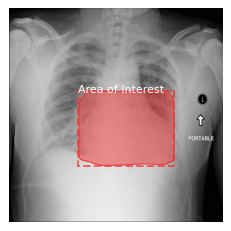

In [9]:
image = np.array(Image.open(OUTPUT_DIR + IMG_ID).convert('RGB'))
results = model.detect([image])
r = results[0]

ids = np.full(r['class_ids'].shape, 1)
labels = np.full(9, 'Area of Interest')
scores = np.full(r['class_ids'].shape, '')
ax = plt.subplot(1,1,1)

colors=[]
for class_id in ids:
    colors.append((.941, .204, .204))

visualize.display_instances(image, r['rois'], r['masks'], ids, labels, scores, colors=colors, ax=ax)

plt.savefig(OUTPUT_DIR+'/mrcnn_out_'+IMG_ID+'.png')
plt.show()
